<a href="https://colab.research.google.com/github/YannisZang/cs-5805-Machine-Learning/blob/main/Linear_regression_bias_variance_dilemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
object_function = lambda x: np.sin (x) + np.random.normal(0, 0.3, len(x))

x = np.linspace(0, 2 * np.pi, 20)
y = object_function(x)
df = pd.DataFrame({'x': x, 'y': y})

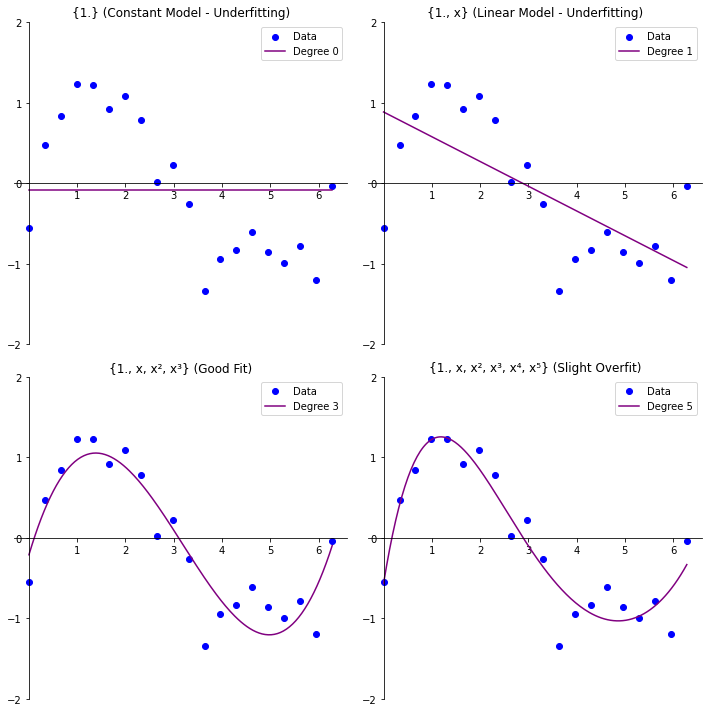

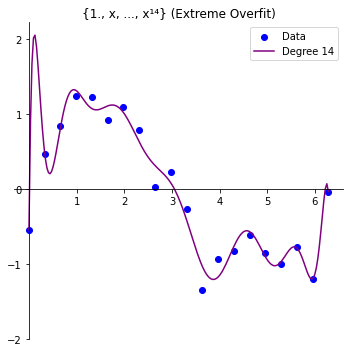

In [ ]:
def polynomial_regression_plot(x, y, degree, ax, title):
    x_plot = np.linspace(0, 2 * np.pi, 200) # For plotting the regression curve

    ########################################
    # Transforming the Feature Space
    ########################################
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    x_plot_poly = poly.transform(x_plot.reshape(-1, 1))

    ########################################
    # Fitting the Model and Making Predictions
    ################################
    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_plot_poly)


    ########################################
    # Plotting
    ########################################
    ax.scatter(x, y, color='blue', label="Data")
    ax.plot(x_plot, y_pred, color='purple', label=f"Degree {degree}")

    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([1, 2, 3, 4, 5, 6])
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_title(title, fontsize=12)
    ax.legend()


########################################
# From underfitting to overfitting
########################################
degrees = [0, 1, 3, 5]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
titles = [
    "{1.} (Constant Model - Underfitting)",
    "{1., x} (Linear Model - Underfitting)",
    "{1., x, x², x³} (Good Fit)",
    "{1., x, x², x³, x⁴, x⁵} (Slight Overfit)",
]
for i, degree in enumerate(degrees):
    polynomial_regression_plot(x, y, degree, axes[i], titles[i])
plt.tight_layout()
plt.show()

########################################
# Extreme Overfitting
########################################
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
degree = 14
title = "{1., x, ..., x¹⁴} (Extreme Overfit)"
polynomial_regression_plot(x, y, degree, ax, title)
plt.tight_layout()
plt.show()